<a href="https://colab.research.google.com/github/ArashdeepKaurV/HOMEWORK/blob/main/ENews_Express_Learner_Notebook_Full_Code.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Business Statistics: E-news Express


## Define Problem Statement and Objectives

## Import all the necessary libraries

In [3]:
# Installing the libraries with the specified version.
!pip install numpy==1.25.2 pandas==2.2.2 matplotlib==3.8.0 seaborn==0.13.1 scipy==1.11.4 -q --user

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 60.4/60.4 kB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 18.2/18.2 MB 44.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.6/11.6 MB 49.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.8/294.8 kB 19.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 36.4/36.4 MB 36.9 MB/s eta 0:00:00
  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.


**Note**: *After running the above cell, kindly restart the notebook kernel and run all cells sequentially from the start again.*

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

## Reading the Data into a DataFrame

In [5]:
from google.colab import drive
drive.mount('/content/drive')

ab = pd.read_csv('/content/drive/MyDrive/abtest.csv.xls')

Mounted at /content/drive


## Explore the dataset and extract insights using Exploratory Data Analysis

- Data Overview
  - Viewing the first and last few rows of the dataset
  - Checking the shape of the dataset
  - Getting the statistical summary for the variables
- Check for missing values
- Check for duplicates

In [6]:
print(ab.head())
print(ab.tail())
print(ab.shape)
print(ab.describe())

print(ab.isnull().sum())
print(ab.duplicated().sum())

   user_id      group landing_page  time_spent_on_the_page converted  \
0   546592    control          old                    3.48        no   
1   546468  treatment          new                    7.13       yes   
2   546462  treatment          new                    4.40        no   
3   546567    control          old                    3.02        no   
4   546459  treatment          new                    4.75       yes   

  language_preferred  
0            Spanish  
1            English  
2            Spanish  
3             French  
4            Spanish  
    user_id      group landing_page  time_spent_on_the_page converted  \
95   546446  treatment          new                    5.15        no   
96   546544    control          old                    6.52       yes   
97   546472  treatment          new                    7.07       yes   
98   546481  treatment          new                    6.20       yes   
99   546483  treatment          new                    5.86     

### Univariate Analysis

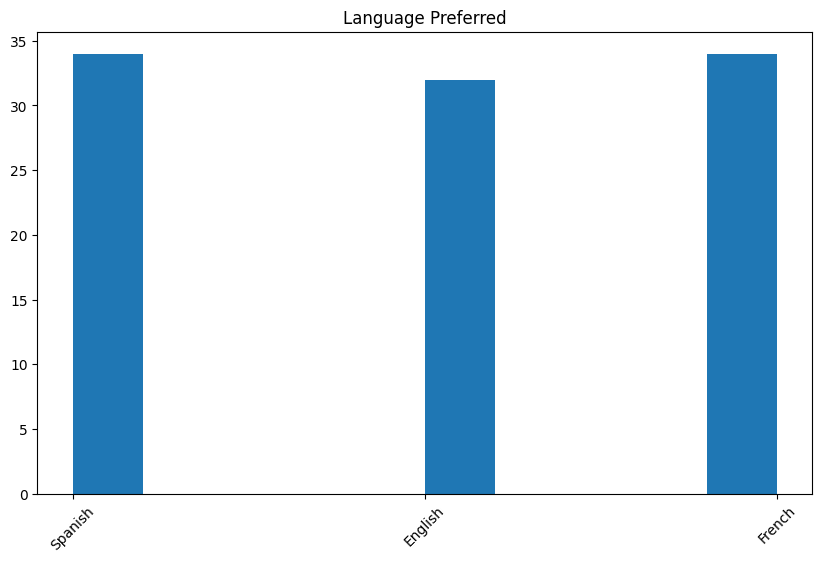

In [12]:
plt.figure(figsize=(10, 6))
plt.hist(ab['language_preferred'])
plt.title('Language Preferred')
plt.xticks(rotation=45)
plt.show()

### Bivariate Analysis

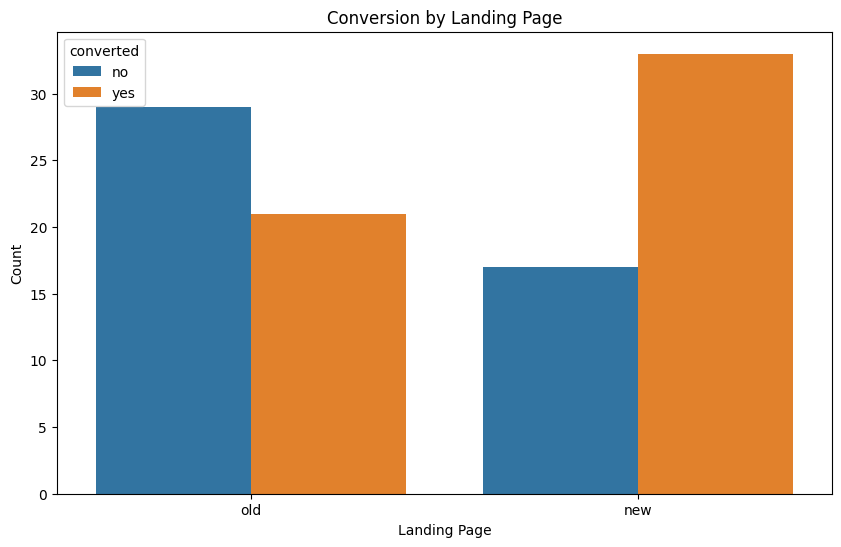

In [11]:
plt.figure(figsize=(10, 6))
sns.countplot(data=ab, x='landing_page', hue='converted')
plt.xlabel('Landing Page')
plt.ylabel('Count')
plt.title('Conversion by Landing Page')
plt.show()

## 1. Do the users spend more time on the new landing page than the existing landing page?

### Perform Visual Analysis

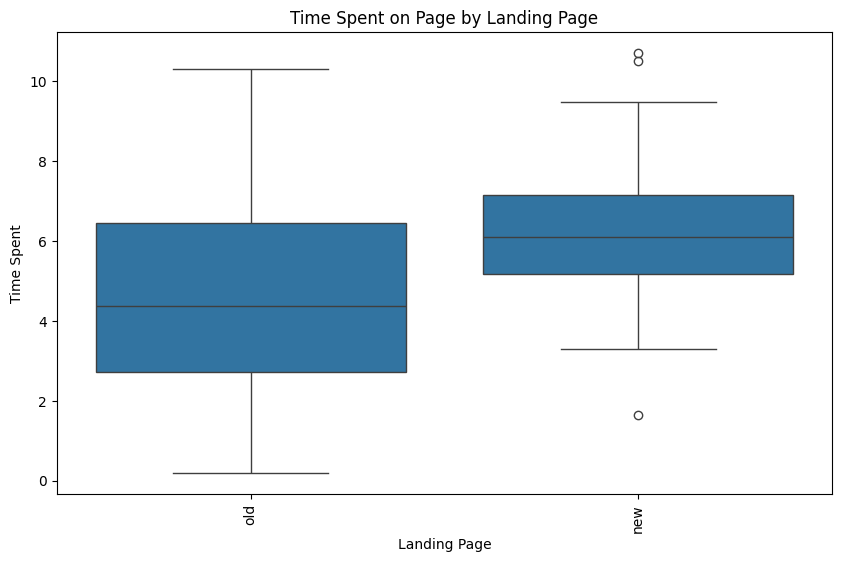

In [14]:
plt.figure(figsize=(10, 6))
sns.boxplot(data=ab, x='landing_page', y='time_spent_on_the_page')
plt.title('Time Spent on Page by Landing Page')
plt.xlabel('Landing Page')
plt.ylabel('Time Spent')
plt.xticks(rotation=90)
plt.show()

### Step 1: Define the null and alternate hypotheses

Null Hypothesis: There is no significant difference in the time spent on the old landing page and the new landing page.
Alternate Hypothesis: There is significant difference in the time spent on the old landing page and the new landing page.

### Step 2: Select Appropriate test

One sample T-test.

### Step 3: Decide the significance level

(alpha) as 0.05


### Step 4: Collect and prepare data

In [26]:
old_time_spent = ab[ab['landing_page'] == 'old']['time_spent_on_the_page']
new_time_spent = ab[ab['landing_page'] == 'new']['time_spent_on_the_page']

### Step 5: Calculate the p-value

In [42]:
from scipy.stats import ttest_ind

t_statistic, p_value = ttest_ind(new_time_spent, old_time_spent, equal_var=False)

print("t-statistic:", t_statistic)
print("p-value:", p_value)

t-statistic: 3.7867702694199856
p-value: 0.0002784762450333098


### Step 6: Compare the p-value with $\alpha$

In [28]:
alpha = 0.05

if p_value < alpha:
    print("Reject the null hypothesis. There is significant difference in the time spent on the old landing page and the new landing page.")
else:
    print("Fail to reject the null hypothesis. There is no significant difference in the time spent on the old landing page and the new landing page.")

Reject the null hypothesis. There is significant difference in the time spent on the old landing page and the new landing page.


### Step 7:  Draw inference

There's a significant difference in the time spent on the old and new landing pages. since users spend more time on the new landing page, it might be more effective in gathering new subscribers.

**A similar approach can be followed to answer the other questions.**

## 2. Is the conversion rate (the proportion of users who visit the landing page and get converted) for the new page greater than the conversion rate for the old page?

In [41]:
from statsmodels.stats.proportion import proportions_ztest

new_conversion = ab[(ab['landing_page'] == 'new') & (ab['converted']== 'yes')].shape[0]
old_conversion = ab[(ab['landing_page'] == 'old') & (ab['converted']== 'yes')].shape[0]
new_total = ab[ab['landing_page'] == 'new'].shape[0]
old_total = ab[ab['landing_page'] == 'old'].shape[0]

successes = np.array([new_conversion, old_conversion])
nobs = np.array([new_total, old_total])

z_statistic, p_value = proportions_ztest(successes, nobs)

print("z-statistic:", z_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("The conversion rate for the new page is greater than the conversion rate for the old page.")
else:
    print("There is no significant difference in the conversion rates for the new and old pages.")

z-statistic: 2.4077170617153842
p-value: 0.016052616408112556
The conversion rate for the new page is greater than the conversion rate for the old page.


## 3. Is the conversion and preferred language are independent or related?

In [37]:
from scipy.stats import chi2_contingency

contingency_table = pd.crosstab(ab['converted'], ab['language_preferred'])
chi2, p_value, dof, expected = chi2_contingency(contingency_table)

print("Tested Statistics", chi2)
print("p-value:", p_value)
print("Degrees of Freedom:", dof)
print("Expected Frequencies:\n", expected)

if p_value < 0.05:
    print("Conversion and preferred language are significantly related.")
else:
    print("Conversion and preferred language are independent")

Tested Statistics 3.0930306905370837
p-value: 0.21298887487543447
Degrees of Freedom: 2
Expected Frequencies:
 [[14.72 15.64 15.64]
 [17.28 18.36 18.36]]
Conversion and preferred language are independent


## 4. Is the time spent on the new page same for the different language users?

In [38]:
from scipy.stats import f_oneway

new_page_data = ab[ab['landing_page'] == 'new']

groups = [new_page_data[new_page_data['language_preferred'] == lang]['time_spent_on_the_page'] for lang in new_page_data['language_preferred'].unique()]

f_statistic, p_value = f_oneway(*groups)

print("F-statistic:", f_statistic)
print("p-value:", p_value)

if p_value < 0.05:
    print("There is a significant difference in the time spent on the new page for different language users.")
else:
    print("There is no significant difference in the time spent on the new page for different language users.")

F-statistic: 0.854399277000682
p-value: 0.43204138694325955
There is no significant difference in the time spent on the new page for different language users.


## Conclusion and Business Recommendations

The new page is significantly more engaging than the old page. my business recommendation to ENews is to adopt the new landing page to increase their subscription. Language preference  did not have a significant affect on conversion rate so no changes are recommended at the moment, in future more test can be conducted to check if the significance changes.

___